In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns

## Loading data

In [3]:
# Load Dataset

x_train = pd.read_csv("/content/csvTrainImages 60k x 784.csv").to_numpy()
y_train = pd.read_csv("/content/csvTrainLabel 60k x 1.csv").to_numpy()
x_test = pd.read_csv("/content/csvTestImages 10k x 784.csv").to_numpy()
y_test = pd.read_csv("/content/csvTestLabel 10k x 1.csv").to_numpy()

FileNotFoundError: [Errno 2] No such file or directory: '/content/csvTrainImages 60k x 784.csv'

In [91]:
arabic_characters = ['alef', 'beh', 'teh', 'theh', 'jeem', 'hah', 'khah', 'dal', 'thal',
                    'reh', 'zain', 'seen', 'sheen', 'sad', 'dad', 'tah', 'zah', 'ain',
                    'ghain', 'feh', 'qaf', 'kaf', 'lam', 'meem', 'noon', 'heh', 'waw', 'yeh']

In [98]:
print(x_train.shape)
print(y_train.shape)

(59999, 784)
(59999, 1)


## Giving the correct shape to the images

In [99]:
#standrize data
x_train, x_test = x_train / 255.0, x_test / 255.0

#split data
x_train1,x_cv,y_train1,y_cv=train_test_split(x_train,y_train,test_size=0.15,random_state=21, stratify=y_train)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(59999, 784) (9999, 784)
(59999, 1) (9999, 1)


In [100]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

train_labels = tf.keras.utils.to_categorical(y_train, 10)
test_labels = tf.keras.utils.to_categorical(y_test, 10)

## Showing the data

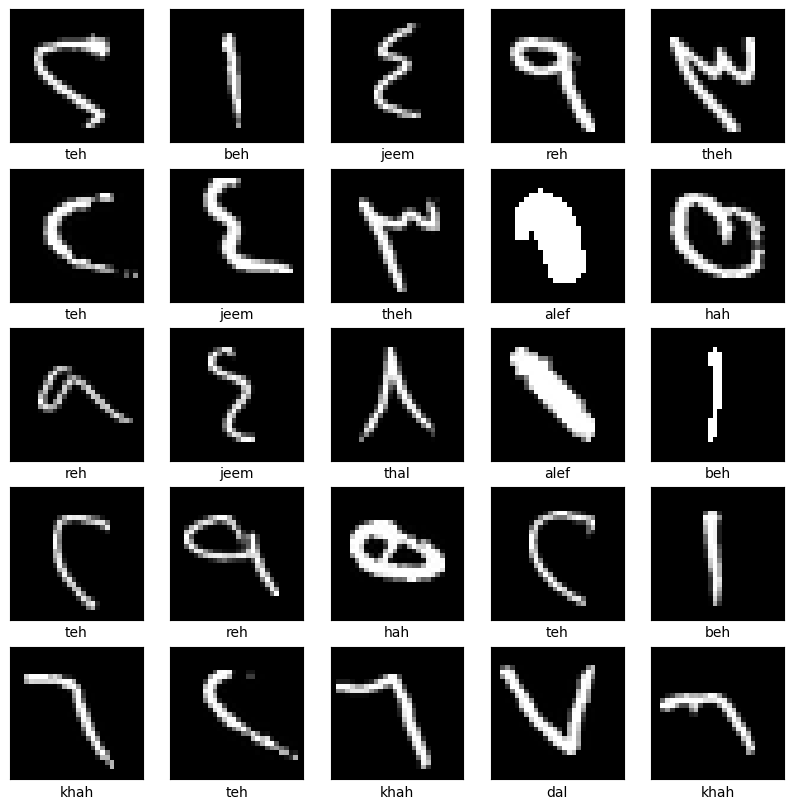

In [102]:
ra = np.random.randint(0, 13440, size=25)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[ra[i]].reshape(28,28).T,"gray")
    plt.xlabel(arabic_characters[int(y_train[ra[i]][0])])
plt.show()

## Data augmentation

In [103]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    keras.layers.experimental.preprocessing.RandomRotation(0.2),
    keras.layers.experimental.preprocessing.RandomZoom(0.4),
])


In [105]:
plt.figure(figsize=(10,10))
for images,_ in y_train.take(1):
  for i in range(16):
    img_augmented  = data_augmentation(images)
    ax = plt.subplot(4,4,i+1)
    plt.imshow(img_augmented[i].numpy().astype('uint8'))
    plt.axis("off")
plt.show()

TypeError: 'numpy.int64' object is not iterable

<Figure size 1000x1000 with 0 Axes>

## Model CNN

In [ ]:
num_classes = 4

In [123]:
model = Sequential(
    [
        tf.keras.layers.InputLayer(input_shape=(784,)),
        Dense(100, activation='relu', name='layer1', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dropout(0.3),
        Dense(50, activation='relu', name='layer2', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dropout(0.3),
        Dense(28, activation='linear', name='layer3')
    ]
)


In [1]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

# Specify early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=12, restore_best_weights=True)

history = model.fit(x_train1, y_train1, epochs=50, batch_size=32,
                    validation_data=(x_cv, y_cv), callbacks=[early_stopping])

NameError: name 'model' is not defined

## Model evaluation

In [119]:
model.evaluate(x_cv,y_cv)

282/282 [==============================] - 1s 2ms/step - loss: 0.2363 - accuracy: 0.9757


[0.23633021116256714, 0.9756666421890259]

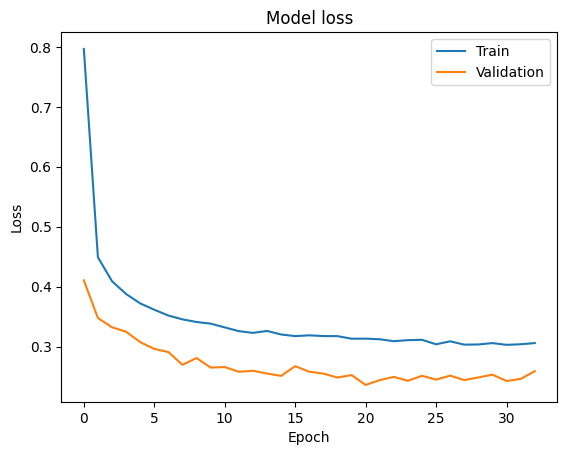

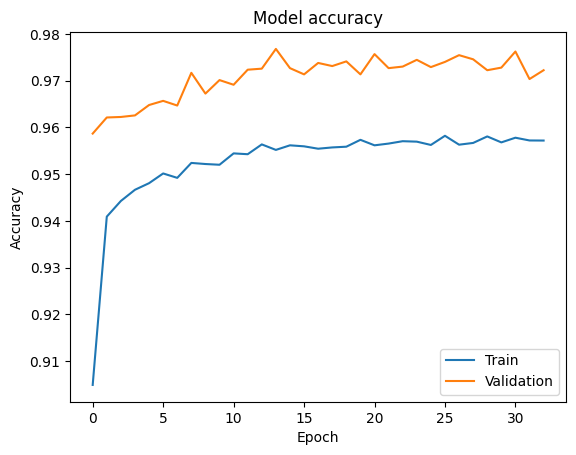

In [120]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

## Preditc on test set

282/282 [==============================] - 1s 2ms/step


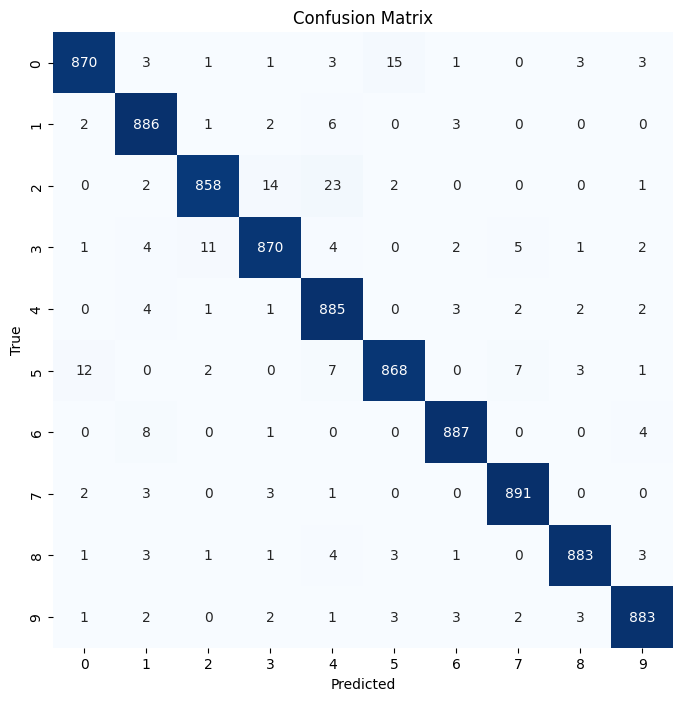

In [121]:
predictions = model.predict(x_cv)

# Convert predictions to class indices
predicted_classes = np.argmax(predictions, axis=1)

true_labels = np.random.randint(0, 10, size=len(predicted_classes))

# Compute confusion matrix
cm = confusion_matrix(y_cv, predicted_classes)

# Plot confusion matrix using seaborn
class_names = [str(i) for i in range(10)]
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

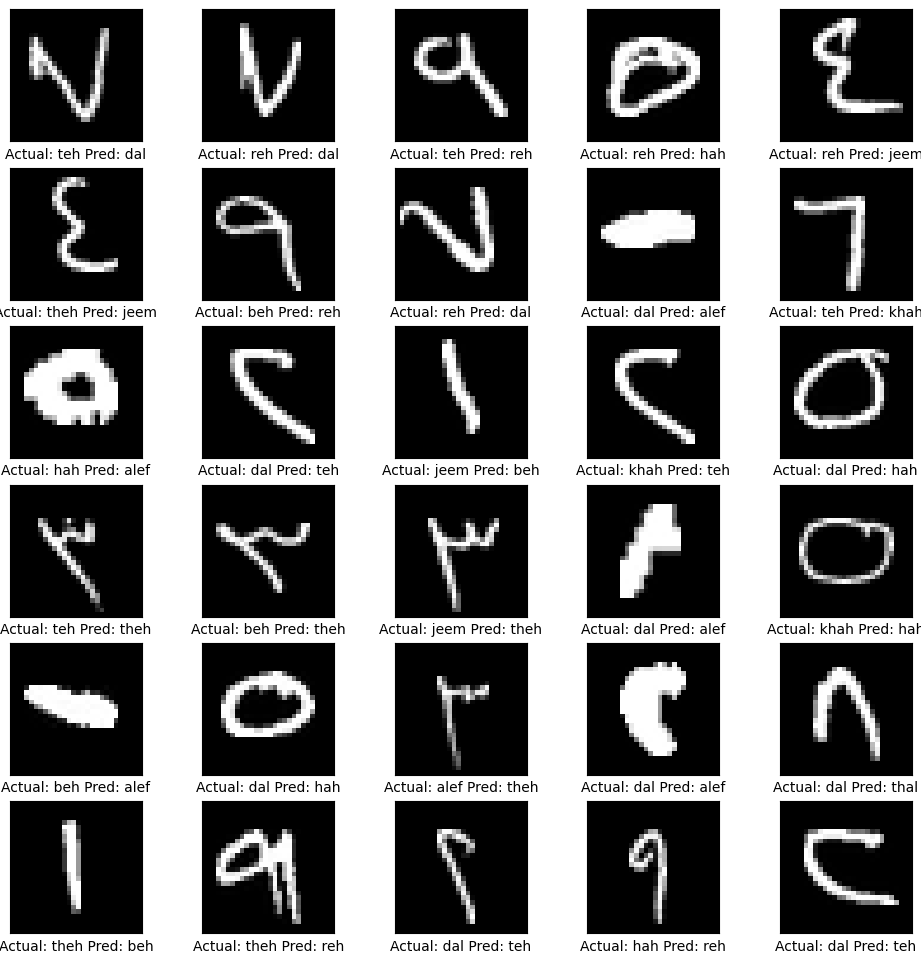

In [122]:
# Plot test img
ra = np.random.randint(0, 3360, size=30)
plt.figure(figsize=(12,12))
for i in range(30):
    plt.subplot(6,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_cv[ra[i]].reshape(28,28).T,"gray")
    plt.xlabel("Actual: "+arabic_characters[int(true_labels[ra[i]])]+ " Pred: "+arabic_characters[int(predicted_classes[ra[i]])])
plt.show()